In [1]:
%run ../utils/configuration.ipynb

In [2]:
%run ./0300_common_functions.ipynb

In [3]:
df=pd.read_parquet(train_model_path) 

In [5]:
df_1 = apply_feature_selection(df, 1)
df_1.head()

,churn_value,number_of_referrals,contract,monthly_charge,age,number_of_dependents
0,1,1,2,60.30,31,0
1,1,0,1,84.75,76,0
2,0,5,2,73.05,20,0
3,0,4,3,106.05,54,0
4,1,1,1,105.65,65,0


In [6]:
df_2 = apply_feature_selection(df, 2)
df_2.head()

,churn_value,number_of_referrals,offer,online_security,online_backup,premium_tech_support,contract,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,1,1,2,1,1,0,2,0,60.30,3563.80,0.0,4562.56,31,0,29914
1,1,0,2,0,0,0,1,0,84.75,1350.15,0.0,1630.31,76,0,51213
2,0,5,2,1,0,0,2,0,73.05,4688.65,0.0,6393.61,20,0,1666
3,0,4,2,1,1,1,3,0,106.05,3834.40,0.0,4577.04,54,0,72199
4,1,1,2,0,1,0,1,0,105.65,4284.80,0.0,5581.55,65,0,32804


In [7]:
df_3 = apply_feature_selection(df, 3)
df_3.head()

,churn_value,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,avg_monthly_gb_download,online_security,online_backup,premium_tech_support,streaming_music,contract,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,1,1,2,1,17.22,21,1,1,0,0,2,1,0,60.30,3563.80,0.0,4562.56,31,0,29914
1,1,0,2,1,17.51,7,0,0,0,0,1,0,0,84.75,1350.15,0.0,1630.31,76,0,51213
2,0,5,2,1,26.64,61,1,0,0,1,2,1,0,73.05,4688.65,0.0,6393.61,20,0,1666
3,0,4,2,1,19.24,18,1,1,1,1,3,1,0,106.05,3834.40,0.0,4577.04,54,0,72199
4,1,1,2,1,33.25,26,0,1,0,1,1,0,0,105.65,4284.80,0.0,5581.55,65,0,32804


In [8]:
model_NN = MLPClassifier(max_iter = 2000, random_state = 99)

In [9]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, model_NN))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, model_NN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.655+/-0.0216,0.653+/-0.0179


precision_score
------------------------------------------


,Train,Validation
NN,0.675+/-0.0078,0.67+/-0.0368


In [10]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, model_NN))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_2,precision_score, model_NN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.739+/-0.006,0.677+/-0.0177


precision_score
------------------------------------------


,Train,Validation
NN,0.78+/-0.0101,0.715+/-0.0241


In [11]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, model_NN))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_3,precision_score, model_NN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.791+/-0.0175,0.677+/-0.0214


precision_score
------------------------------------------


,Train,Validation
NN,0.821+/-0.0153,0.705+/-0.0334


Model Optimization

In [12]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [13]:
def get_models_nn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)

    for name, model in models.items():
        train_results, val_results  = select_best_models(data, model)
        avg_train, std_train, avg_val, std_val = apply_score(train_results, val_results, f1_score)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

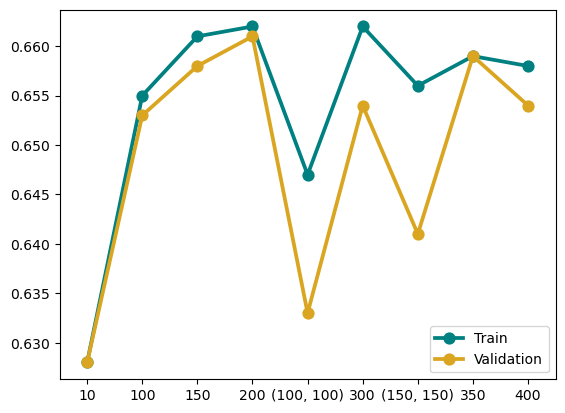

In [ ]:
values_try = [(10),(100),(150),(200),(100,100),(300),(150,150),(350),(400)]
results_train, results_val, names = get_models_nn(df_1, values_try)
point_plot(results_train, results_val, names)

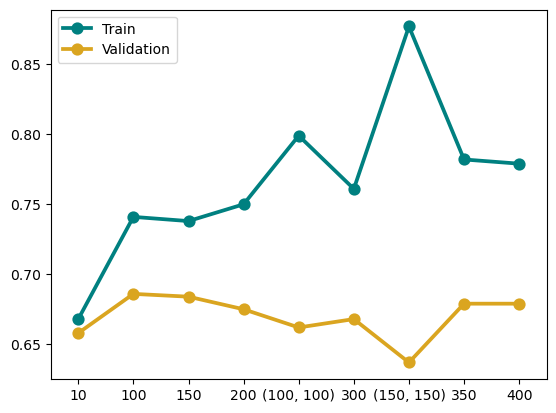

In [ ]:
values_try = [(10),(100),(150),(200),(100,100),(300),(150,150),(350),(400)]
results_train, results_val, names = get_models_nn(df_2, values_try)
point_plot(results_train, results_val, names)

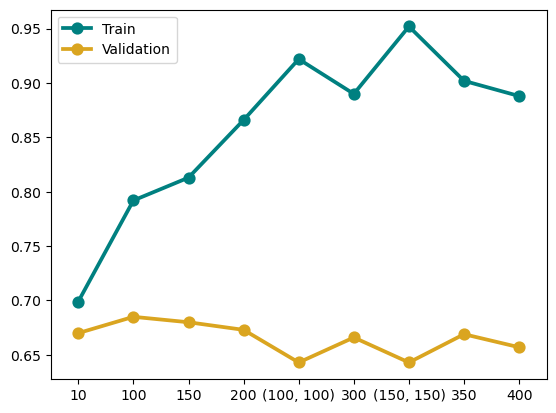

In [ ]:
values_try = [(10),(100),(150),(200),(100,100),(300),(150,150),(350),(400)]
results_train, results_val, names = get_models_nn(df_3, values_try)
point_plot(results_train, results_val, names)

## Random Search

In [30]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, final_model_nn))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, final_model_nn))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.639+/-0.0068,0.639+/-0.017


precision_score
------------------------------------------


,Train,Validation
NN,0.648+/-0.0048,0.648+/-0.0233


### Perspectiva 2

In [33]:
data = df_2.copy()

X_data = data.drop(['churn_value'], axis = 1)
y_data = data['churn_value'].copy()

scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [34]:
nn = MLPClassifier(max_iter = 2000, random_state = 99)

parameter_space_random = {
    'hidden_layer_sizes': [(280),(290),(300),(310),(320)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu']
}

# DO IT
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random,
                                   scoring='f1', cv=5, random_state=99)

In [35]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': 290, 'activation': 'relu'}
Best Score:  0.6870663316897992


In [ ]:
final_model_nn = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (290),
                               learning_rate = 'constant',
                               learning_rate_init = 0.0001,
                               solver = 'adam', max_iter = 2000, random_state = 99)

In [32]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, final_model_nn))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.709+/-0.0078,0.68+/-0.015


### Perspectiva 3

In [24]:
data = df_3.copy()

X_data = data.drop(['churn_value'], axis = 1)
y_data = data['churn_value'].copy()


scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [25]:
# DO IT
nn = MLPClassifier(max_iter = 2000, random_state = 99)

In [26]:
parameter_space_random = {
    'hidden_layer_sizes': [(280),(290),(300),(310),(320)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu']
}

In [27]:
# DO IT
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random,
                                   scoring='f1', cv=5, random_state=99)

In [28]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': 290, 'activation': 'relu'}
Best Score:  0.6994034949754618


In [29]:
final_model_nn = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (290),
                               learning_rate = 'constant',
                               learning_rate_init = 0.0001,
                               solver = 'adam', max_iter = 2000, random_state = 99)

In [31]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, final_model_nn))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.748+/-0.0058,0.693+/-0.0156


GridSearch

In [ ]:
parameter_space_grid = {
    'hidden_layer_sizes': [(280)],
    'learning_rate_init': [0.01, 0.005, 0.015],
    'learning_rate': ['constant'],
    'solver': ['sgd','adam'],
    'activation': ['relu']
    }

In [ ]:
# DO IT
grid_search = GridSearchCV(nn, parameter_space_grid, scoring='f1', return_train_score=True, cv=5)

In [ ]:
grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': 280, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
Best Score:  0.9598479916289675


In [ ]:
final_model_nn = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (280),
                               learning_rate = 'constant',
                               learning_rate_init = 0.01,
                               solver = 'sgd', max_iter = 2000, random_state = 99)

In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, final_model_nn))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, final_model_nn))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.635+/-0.0106,0.63+/-0.015


precision_score
------------------------------------------


,Train,Validation
NN,0.675+/-0.0112,0.667+/-0.0166


In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, final_model_nn))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_2,precision_score, final_model_nn))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.707+/-0.0056,0.676+/-0.0224


precision_score
------------------------------------------


,Train,Validation
NN,0.764+/-0.0081,0.732+/-0.0206


In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, final_model_nn))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_3,precision_score, final_model_nn))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.764+/-0.0117,0.683+/-0.0144


precision_score
------------------------------------------


,Train,Validation
NN,0.792+/-0.0056,0.711+/-0.012
